# Import Libraries

In [15]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

#### Importing Data

In [16]:
ionosphere = fetch_ucirepo(id=52)
X = ionosphere.data.features
y = ionosphere.data.targets

In [17]:
print(ionosphere.variables.head())
print(X.head())
print(y.value_counts())

         name     role        type demographic description units  \
0  Attribute1  Feature  Continuous        None        None  None   
1  Attribute2  Feature  Continuous        None        None  None   
2  Attribute3  Feature  Continuous        None        None  None   
3  Attribute4  Feature  Continuous        None        None  None   
4  Attribute5  Feature  Continuous        None        None  None   

  missing_values  
0             no  
1             no  
2             no  
3             no  
4             no  
   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           1           0     0.99539    -0.05889     0.85243     0.02306   
1           1           0     1.00000    -0.18829     0.93035    -0.36156   
2           1           0     1.00000    -0.03365     1.00000     0.00485   
3           1           0     1.00000    -0.45161     1.00000     1.00000   
4           1           0     1.00000    -0.02401     0.94140     0.06531   

   Attribute7 

#### Data is Normalized and it has No missing values and Outliers

# PCA

In [18]:
# PCA for All Components
pca = PCA(n_components=len(X.columns))
X_pca = pca.fit_transform(X)

#### Explained Variance by each Component and Cumulative Variance

In [19]:
ExplainedVariance = pca.explained_variance_ratio_
CumulativeVariance = np.cumsum(ExplainedVariance)
for i, var in enumerate(ExplainedVariance, 1):
    print(f"Component {i}: {var:.4f}")
print("\n")
print("Cumulative Variance:")
for i, cum_var in enumerate(CumulativeVariance, 1):
    print(f"Component {i}: {cum_var:.4f}")

Component 1: 0.3134
Component 2: 0.1227
Component 3: 0.0748
Component 4: 0.0694
Component 5: 0.0487
Component 6: 0.0368
Component 7: 0.0300
Component 8: 0.0287
Component 9: 0.0270
Component 10: 0.0225
Component 11: 0.0206
Component 12: 0.0184
Component 13: 0.0174
Component 14: 0.0165
Component 15: 0.0144
Component 16: 0.0140
Component 17: 0.0128
Component 18: 0.0119
Component 19: 0.0113
Component 20: 0.0109
Component 21: 0.0101
Component 22: 0.0095
Component 23: 0.0078
Component 24: 0.0072
Component 25: 0.0070
Component 26: 0.0062
Component 27: 0.0058
Component 28: 0.0052
Component 29: 0.0049
Component 30: 0.0043
Component 31: 0.0041
Component 32: 0.0034
Component 33: 0.0023
Component 34: 0.0000


Cumulative Variance:
Component 1: 0.3134
Component 2: 0.4362
Component 3: 0.5109
Component 4: 0.5803
Component 5: 0.6290
Component 6: 0.6658
Component 7: 0.6958
Component 8: 0.7246
Component 9: 0.7516
Component 10: 0.7741
Component 11: 0.7948
Component 12: 0.8131
Component 13: 0.8306
Componen

# Scree Plot

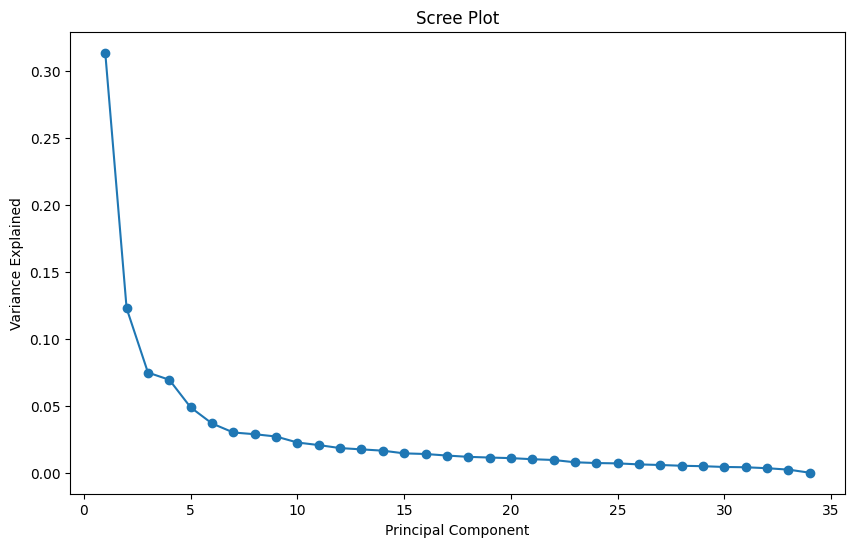

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ExplainedVariance) + 1), ExplainedVariance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

#### انتخاب مولفه‌ها برای حفظ 70% تا 90% واریانس

In [21]:
OptimalComponents = np.argmax(CumulativeVariance >= 0.7) + 1
print(f"Number of components for {0.7*100}% variance: {OptimalComponents}")

Number of components for 70.0% variance: 8


##### تبدیل برچسب‌ها به مقادیر عددی

In [22]:
y_numeric = []
for i in range(0,351):
    if y.values[i][0] == 'g':
        y_numeric.append(1)
    elif y.values[i][0] == 'b':
        y_numeric.append(0)

# LDA

In [23]:
lda = LDA(n_components=1)  # حداکثر ابعاد ممکن = تعداد کلاس‌ها - 1
X_lda = lda.fit_transform(X, y_numeric)
print(f"\nLDA Explained Variance Ratio: {lda.explained_variance_ratio_}")
print(f"Transformed LDA shape: {X_lda.shape}")


LDA Explained Variance Ratio: [1.]
Transformed LDA shape: (351, 1)


#### تابع برای اجرای K-means و محاسبه Silhouette Score


In [24]:
def kmeans_clustering(X_reduced, k_values):
    results = {}
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
        labels = kmeans.fit_predict(X_reduced)
        score = silhouette_score(X_reduced, labels)
        results[k] = score
        print(f"K={k}: Silhouette Score={score:.4f}")
    return results

#### خوشه‌بندی روی داده‌های PCA کاهش‌یافته


In [25]:
print("K-means clustering on PCA-reduced data:")
k_values = [2, 3, 4, 5, 6]
pca_results = kmeans_clustering(X_pca[:, :OptimalComponents], k_values)

K-means clustering on PCA-reduced data:
K=2: Silhouette Score=0.3602
K=3: Silhouette Score=0.3466
K=4: Silhouette Score=0.3694
K=5: Silhouette Score=0.3399
K=6: Silhouette Score=0.3111


#### خوشه‌بندی روی داده‌های LDA کاهش‌یافته


In [26]:
print("\nK-means clustering on LDA-reduced data:")
lda_results = kmeans_clustering(X_lda, k_values)


K-means clustering on LDA-reduced data:
K=2: Silhouette Score=0.6986
K=3: Silhouette Score=0.6283
K=4: Silhouette Score=0.6038
K=5: Silhouette Score=0.5945
K=6: Silhouette Score=0.5780


# تابع برای رسم Dendrogram Plot

In [27]:
def plot_dendrogram(X_reduced, method='ward'):
    plt.figure(figsize=(12, 8))
    linked = linkage(X_reduced, method=method)
    dendrogram(linked, truncate_mode='level', p=5)  # محدودیت نمایش تا 5 سطح
    plt.title("Dendrogram")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.show()

#### رسم Dendrogram برای PCA و LDA


Dendrogram for PCA-reduced data:


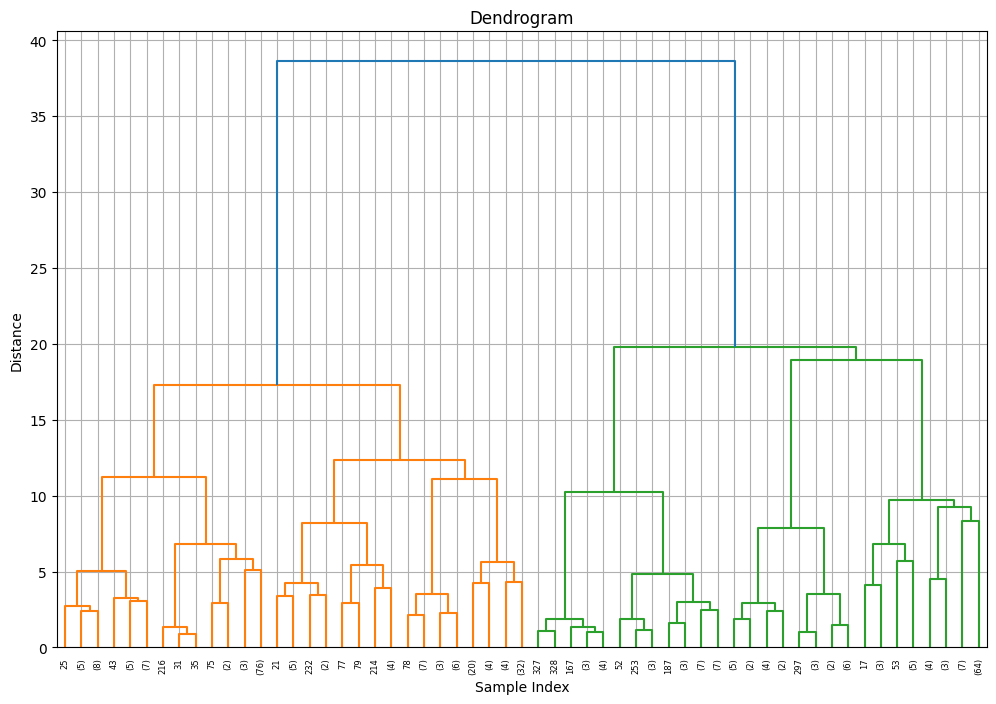


Dendrogram for LDA-reduced data:


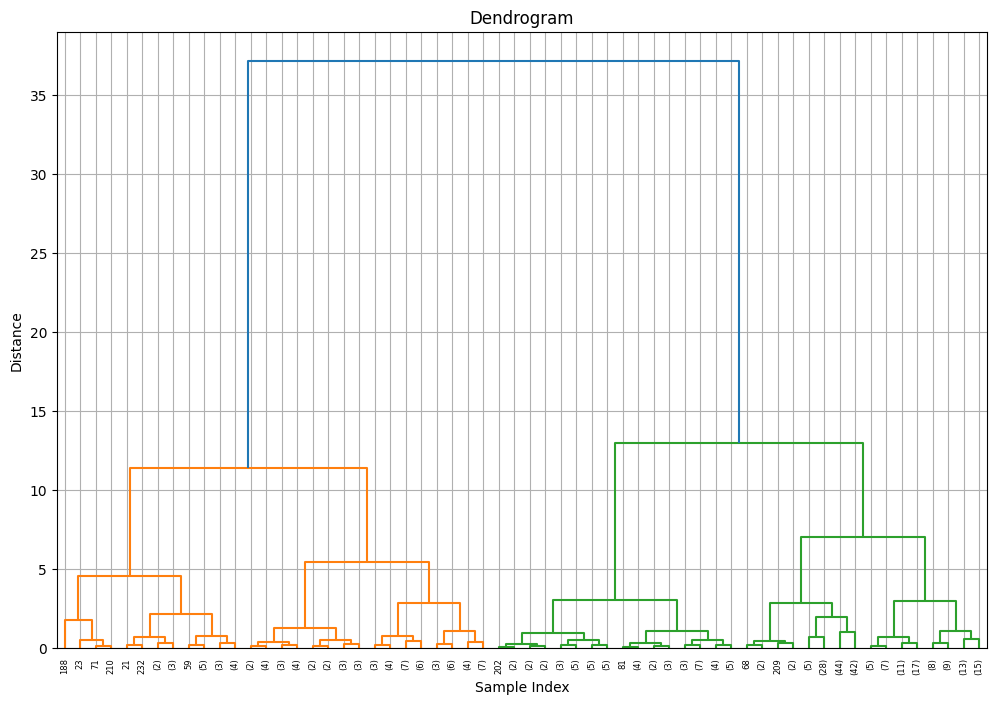

In [28]:
print("\nDendrogram for PCA-reduced data:")
plot_dendrogram(X_pca[:, :OptimalComponents])

print("\nDendrogram for LDA-reduced data:")
plot_dendrogram(X_lda)

#### اجرای خوشه‌بندی سلسله‌ مراتبی برای داده های کاهش بعد داده شده قبلی

In [30]:
def hierarchical_clustering(X_reduced, k_values):
    results = {}
    for k in k_values:
        clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
        labels = clustering.fit_predict(X_reduced)
        score = silhouette_score(X_reduced, labels)
        results[k] = score
        print(f"K={k}: Silhouette Score={score:.4f}")
    return results
print("\nHierarchical clustering on PCA-reduced data:")
hierarchical_pca = hierarchical_clustering(X_pca[:, :OptimalComponents], k_values)

print("\nHierarchical clustering on LDA-reduced data:")
hierarchical_lda = hierarchical_clustering(X_lda, k_values)


Hierarchical clustering on PCA-reduced data:
K=2: Silhouette Score=0.3422
K=3: Silhouette Score=0.3353
K=4: Silhouette Score=0.3486
K=5: Silhouette Score=0.2376
K=6: Silhouette Score=0.2335

Hierarchical clustering on LDA-reduced data:
K=2: Silhouette Score=0.6990
K=3: Silhouette Score=0.5515
K=4: Silhouette Score=0.5720
K=5: Silhouette Score=0.5339
K=6: Silhouette Score=0.5285


#### ذخیره نتایج در جدول و مقایسه

In [31]:
comparison_df = pd.DataFrame({
    "K-Means (PCA)": pca_results,
    "K-Means (LDA)": lda_results,
    "Hierarchical (PCA)": hierarchical_pca,
    "Hierarchical (LDA)": hierarchical_lda
})
print("Comparison of Clustering Results:")
print(comparison_df)

Comparison of Clustering Results:
   K-Means (PCA)  K-Means (LDA)  Hierarchical (PCA)  Hierarchical (LDA)
2       0.360234       0.698585            0.342243            0.699000
3       0.346621       0.628273            0.335262            0.551503
4       0.369350       0.603813            0.348580            0.572041
5       0.339922       0.594471            0.237556            0.533854
6       0.311094       0.578031            0.233537            0.528457


#### بهترین نتیجه برای هر روش

In [32]:
best_method = comparison_df.idxmax(axis=1)
print("Best clustering method for each K:")
print(best_method)

Best clustering method for each K:
2    Hierarchical (LDA)
3         K-Means (LDA)
4         K-Means (LDA)
5         K-Means (LDA)
6         K-Means (LDA)
dtype: object
